In [1]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
df = pd.read_csv(os.path.join("Q3_delivery_char_v10.csv"))
df.head(2)
df.count()

Month                               3690
Birthplace                          3690
Delivery                            3690
Fetalpresentation                   3690
Bin_Five_min_APGAR_score_code       3690
Average_Age_Mother_years            3690
Average_Birth_Weight_grams          3690
Average_Prenatal_Visits             3690
Average_OE_Gestational_Age_weeks    3690
Average_Pre-pregnancy_BMI           3621
Births                              3690
dtype: int64

In [4]:
df = df.dropna()
df.head()

,Month,Birthplace,Delivery,Fetalpresentation,Bin_Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI,Births
0,January,Hospital,Vaginal,Cephalic,0,27.78,1948.11,8.06,30.03,27.83,172
1,January,Hospital,Vaginal,Cephalic,0,27.87,1354.81,6.65,26.65,28.90,880
2,January,Hospital,Vaginal,Cephalic,0,27.63,2263.18,8.61,32.50,27.41,602
3,January,Hospital,Vaginal,Cephalic,0,27.53,2775.35,10.08,35.71,27.60,647
4,January,Hospital,Vaginal,Cephalic,0,27.41,2875.56,10.15,36.63,26.93,905


In [5]:
df.count()

Month                               3621
Birthplace                          3621
Delivery                            3621
Fetalpresentation                   3621
Bin_Five_min_APGAR_score_code       3621
Average_Age_Mother_years            3621
Average_Birth_Weight_grams          3621
Average_Prenatal_Visits             3621
Average_OE_Gestational_Age_weeks    3621
Average_Pre-pregnancy_BMI           3621
Births                              3621
dtype: int64

In [6]:
df1 = df[['Bin_Five_min_APGAR_score_code','Average_Age_Mother_years','Average_Birth_Weight_grams','Average_Prenatal_Visits','Average_OE_Gestational_Age_weeks','Average_Pre-pregnancy_BMI','Births','Month', 'Birthplace','Delivery', 'Fetalpresentation']]
df1.head(2)

,Bin_Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI,Births,Month,Birthplace,Delivery,Fetalpresentation
0,0,27.78,1948.11,8.06,30.03,27.83,172,January,Hospital,Vaginal,Cephalic
1,0,27.87,1354.81,6.65,26.65,28.90,880,January,Hospital,Vaginal,Cephalic


In [7]:
one_hot_df1 = pd.get_dummies(df1, prefix=['Month', 'Birthplace','Delivery', 'Fetalpresentation'])
one_hot_df1.head()

,Bin_Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI,Births,Month_April,Month_August,Month_December,...,Month_September,Birthplace_Freestanding_Birth_Center,Birthplace_Home,Birthplace_Hospital,Birthplace_Other,Delivery_Csection,Delivery_Vaginal,Fetalpresentation_Breech,Fetalpresentation_Cephalic,Fetalpresentation_Other
0,0,27.78,1948.11,8.06,30.03,27.83,172,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,27.87,1354.81,6.65,26.65,28.90,880,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,27.63,2263.18,8.61,32.50,27.41,602,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,27.53,2775.35,10.08,35.71,27.60,647,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,27.41,2875.56,10.15,36.63,26.93,905,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [8]:
X = one_hot_df1.iloc[:, 1:28].values
y = one_hot_df1.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [18]:
model = XGBClassifier(n_estimators=100,colsample_bytree=0.8,max_depth=6) 
eval_set = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric=["error","logloss"], eval_set=eval_set, verbose=True) 
print(model)

[0]	validation_0-error:0.131807	validation_0-logloss:0.636961	validation_1-error:0.165593	validation_1-logloss:0.641184
[1]	validation_0-error:0.125099	validation_0-logloss:0.590626	validation_1-error:0.164673	validation_1-logloss:0.601676
[2]	validation_0-error:0.117206	validation_0-logloss:0.550719	validation_1-error:0.156394	validation_1-logloss:0.566602
[3]	validation_0-error:0.112076	validation_0-logloss:0.526242	validation_1-error:0.150874	validation_1-logloss:0.54736
[4]	validation_0-error:0.109708	validation_0-logloss:0.493394	validation_1-error:0.156394	validation_1-logloss:0.518027
[5]	validation_0-error:0.109313	validation_0-logloss:0.464116	validation_1-error:0.160074	validation_1-logloss:0.492802
[6]	validation_0-error:0.106551	validation_0-logloss:0.44015	validation_1-error:0.153634	validation_1-logloss:0.473195
[7]	validation_0-error:0.103788	validation_0-logloss:0.419475	validation_1-error:0.156394	validation_1-logloss:0.455981
[8]	validation_0-error:0.102605	validation

[68]	validation_0-error:0.058406	validation_0-logloss:0.178162	validation_1-error:0.144434	validation_1-logloss:0.310779
[69]	validation_0-error:0.058406	validation_0-logloss:0.177589	validation_1-error:0.144434	validation_1-logloss:0.310947
[70]	validation_0-error:0.057222	validation_0-logloss:0.175981	validation_1-error:0.144434	validation_1-logloss:0.310935
[71]	validation_0-error:0.057616	validation_0-logloss:0.175269	validation_1-error:0.143514	validation_1-logloss:0.311033
[72]	validation_0-error:0.056038	validation_0-logloss:0.173315	validation_1-error:0.143514	validation_1-logloss:0.309891
[73]	validation_0-error:0.054854	validation_0-logloss:0.170975	validation_1-error:0.144434	validation_1-logloss:0.309121
[74]	validation_0-error:0.054065	validation_0-logloss:0.170465	validation_1-error:0.143514	validation_1-logloss:0.309321
[75]	validation_0-error:0.052486	validation_0-logloss:0.168867	validation_1-error:0.143514	validation_1-logloss:0.309249
[76]	validation_0-error:0.052486

In [19]:
y_pred = model.predict(X_test)
predictions =[round(value) for value in y_pred]

In [20]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100))

Accuracy: 86.02%


In [21]:
#retrieve performance metrics
results =model.evals_result()
epochs=len(results['validation_0']['error'])
x_axis =range(0,epochs)

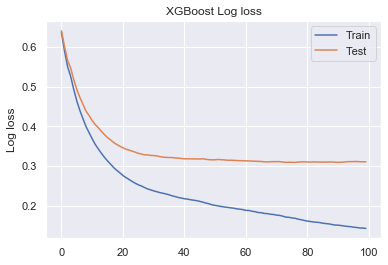

In [22]:
#plot log loss
fig,ax=plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log loss')
plt.title('XGBoost Log loss')
plt.show()

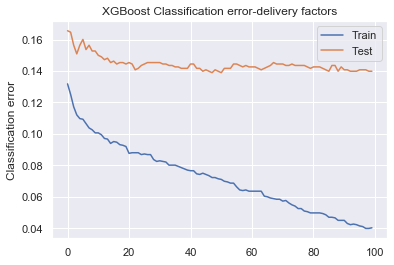

In [24]:
#plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification error')
plt.title('XGBoost Classification error-delivery factors')
plt.show()
fig.savefig('Q3_errorplot.png')

In [27]:
#avoid overfitting model
model = XGBClassifier(n_estimators=80,colsample_bylevel=0.8,max_depth=6) 

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.165593
[1]	validation_0-error:0.157314
[2]	validation_0-error:0.155474
[3]	validation_0-error:0.153634
[4]	validation_0-error:0.147194
[5]	validation_0-error:0.144434
[6]	validation_0-error:0.148114
[7]	validation_0-error:0.146274
[8]	validation_0-error:0.143514
[9]	validation_0-error:0.147194
[10]	validation_0-error:0.146274
[11]	validation_0-error:0.144434
[12]	validation_0-error:0.145354
[13]	validation_0-error:0.145354
[14]	validation_0-error:0.146274
[15]	validation_0-error:0.146274
[16]	validation_0-error:0.146274
[17]	validation_0-error:0.144434
[18]	validation_0-error:0.143514
[19]	validation_0-error:0.141674
[20]	validation_0-error:0.143514
[21]	validation_0-error:0.140754
[22]	validation_0-error:0.140754
[23]	validation_0-error:0.138914
[24]	validation_0-error:0.139834
[25]	validation_0-error:0.138914
[26]	validation_0-error:0.139834
[27]	validation_0-error:0.139834
[28]	validation_0-error:0.137994
[29]	validation_0-error:0.137994
[30]	validation_0-er